# **Hugging Face Datasets 사용해보기 ①**

* Natuaral Language Processing with Transformers 관련 원서 및 Github 및 Hugging Face Dataset 등 참조함

## **1. Dataset - Text Classification 경우**

<img alt="Hugging Face Pipeline" caption="A typical pipeline for training transformer models with the image:images/logo.png[hf,13,13] Datasets, image:images/logo.png[hf,13,13] Tokenizers, and image:images/logo.png[hf,13,13] Transformers libraries" src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter02_hf-libraries.png?raw=1" id="hf-libraries"/>


감정 감지기를 구축하기 위해 **영어 트위터 메시지에서 감정이 어떻게 표현되는지 살펴본 기사의 훌륭한 데이터 세트를 사용**하겠습니다.각주:[E. Saravia 외, "CARER: 감정 인식을 위한 맥락화된 감정 표현", _자연어 처리의 경험적 방법에 관한 2018 컨퍼런스 논문집_ (2018.10-11): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.] 대부분의 감정 분석 데이터 세트가 '긍정'과 '부정'의 양극성만을 포함하는 것과 달리, **이 데이터 세트에는 분노, 혐오, 두려움, 기쁨, 슬픔, 놀라움의 여섯 가지 기본 감정이 포함되어 있습니다.** 트윗이 주어지면 이러한 감정 중 하나로 분류할 수 있는 모델을 훈련하는 것이 과제입니다.

To build our emotion detector we'll use a great dataset from an article that explored how emotions are represented in English Twitter messages.footnote:[E. Saravia et al., "CARER: Contextualized Affect Representations for Emotion Recognition," _Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing_ (Oct–Nov 2018): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.] Unlike most sentiment analysis datasets that involve just "positive" and "negative" polarities, this dataset contains six basic emotions: anger, disgust, fear, joy, sadness, and surprise. Given a tweet, our task will be to train a model that can classify it into one of these emotions.


In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install huggingface_hub

### A First Look at Hugging Face Datasets (Hugging Face 데이터 세트 살펴보기)

We will use **image:images/logo.png[hf,13,13] Datasets to download the data from the [Hugging Face Hub](https://huggingface.co/datasets)**. We can use the `list_datasets()` function to see what datasets are available on the Hub:

이미지:images/logo.png[hf,13,13] 데이터세트를 사용하여 허깅 페이스 허브에서 데이터를 다운로드하겠습니다. **list_datasets() 함수를 사용하여 허브에서 어떤 데이터세트를 사용할 수 있는지 확인**할 수 있습니다:

* 프로그램 실행 시점에 따라 Datasets 숫자는 달라짐 (계속 현행화되기 때문임)

In [2]:
# 'datasets' 라이브러리에서 'list_datasets' 함수를 가져옵니다.
from datasets import list_datasets

# 'list_datasets' 함수를 사용하여 현재 Hugging Face Hub에서 사용 가능한 모든 데이터셋의 목록을 가져옵니다.
# 주의: 'list_datasets'는 제너레이터를 반환하므로 'len()' 함수를 직접 사용할 수 없습니다.
all_datasets = list_datasets()

# 사용 가능한 데이터셋의 총 수를 출력합니다.
print(f"There are {len(all_datasets)} datasets currently available on the Hub")

# 사용 가능한 데이터셋 중 처음 10개를 출력합니다.
print(f"The first 10 are: {all_datasets[:10]}")


<ipython-input-2-c561fdca1b35>:6: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 59899 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
# 'huggingface_hub' 라이브러리에서 'list_datasets' 함수를 가져옵니다.
from huggingface_hub import list_datasets

# 'list_datasets' 함수를 사용하여 현재 Hugging Face Hub에서 사용 가능한 모든 데이터셋의 목록을 가져옵니다.
# 반환된 제너레이터를 리스트로 변환하여 'all_datasets' 변수에 저장합니다.
all_datasets = list(list_datasets())

# 사용 가능한 데이터셋의 총 수를 출력합니다.
print(f"There are {len(all_datasets)} datasets currently available on the Hub")

# 사용 가능한 데이터셋 중 처음 2개를 출력합니다.
print(f"The first 2 are: {all_datasets[:2]}")


There are 59547 datasets currently available on the Hub
The first 2 are: [DatasetInfo: { 
  {'_id': '621ffdd236468d709f181d58',
   'author': None,
   'cardData': None,
   'citation': '@inproceedings{veyseh-et-al-2020-what,\n'
               '   title={{What Does This Acronym Mean? Introducing a New Dataset for Acronym Identification and '
               'Disambiguation}},\n'
               '   author={Amir Pouran Ben Veyseh and Franck Dernoncourt and Quan Hung Tran and Thien Huu Nguyen},\n'
               '   year={2020},\n'
               '   booktitle={Proceedings of COLING},\n'
               '   link={https://arxiv.org/pdf/2010.14678v1.pdf}\n'
               '}',
   'description': 'Acronym identification training and development sets for the acronym identification task at '
                  'SDU@AAAI-21.',
   'disabled': False,
   'downloads': 4697,
   'gated': False,
   'id': 'acronym_identification',
   'lastModified': '2023-01-25T14:18:28.000Z',
   'likes': 17,
   'paperswithco

Hugging Face Datasets 현황 - 확인 시점에 **59,532개 데이터세트**가 있음

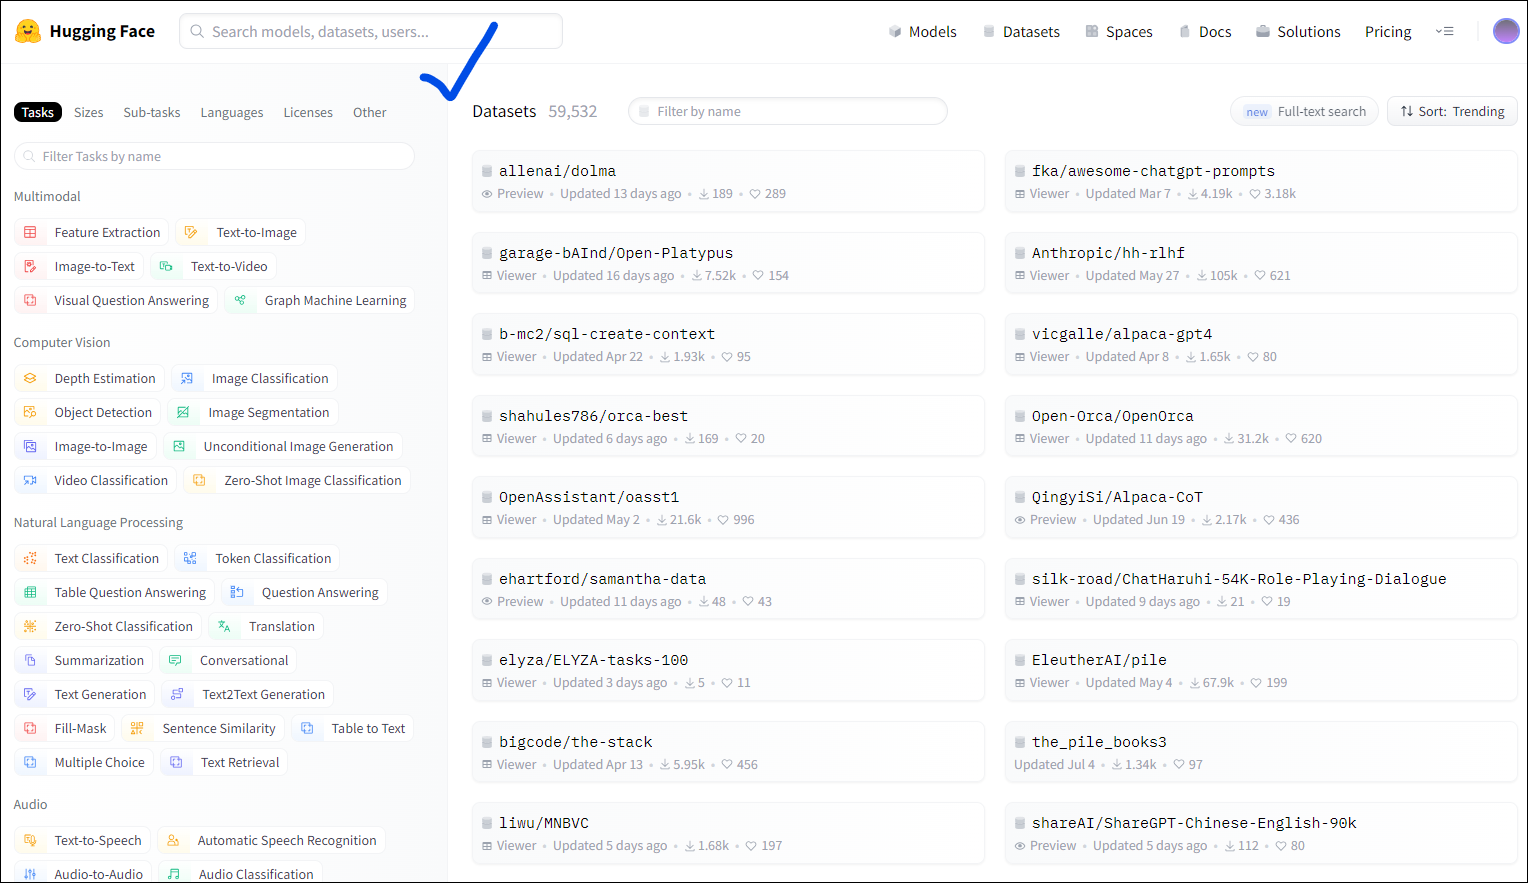


We see that **each dataset is given a name, so let's load the emotion dataset with the load_dataset() function:**

각 데이터 세트에 이름이 지정된 것을 볼 수 있으므로 load_dataset() 함수를 사용하여 감정 데이터 세트를 로드해 보겠습니다:

In [ ]:
%%capture
# %%capture 매직 커맨드는 해당 셀의 모든 출력 (표준 출력 및 표준 오류)을 캡처하여 숨깁니다.

# 'datasets' 라이브러리에서 'load_dataset' 함수를 가져옵니다.
from datasets import load_dataset

# "emotion" 데이터셋을 Hugging Face Hub에서 로드하고, 'emotions' 변수에 저장합니다.
emotions = load_dataset("emotion")


If we look inside our `emotions` object:

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

we see it is similar to a Python dictionary, with each key corresponding to a different split. And we can use the usual dictionary syntax to access an individual split:

각 키가 다른 분할에 해당하는 파이썬 사전과 유사하다는 것을 알 수 있습니다.
그리고 일반적인 사전 구문을 사용하여 개별 분할에 액세스할 수 있습니다:


**참고: Dictionary(사전)**

□	딕셔너리 자료 구조는 사전과 유사. 사전에서 단어와 그 단어에 대한 설명이 쌍을 이루고 있듯이 딕셔너리는 키(key)와 그에 해당하는 값(value)의 쌍들을 원소들로 갖음.

□	딕셔너리 자료형은 :로 구분된 key와 value의 쌍들을 중괄호 { }로 묶은 형태

□	집합과 동일하게 딕셔너리에서도 원소들의 순서는 중요하지 않음

□	숫자 범위로 인덱싱되는 시퀀스와 달리 딕셔너리는 키로 인덱싱되며 변경 불가능한 유형이 될 수 있음. 문자열과 숫자는 항상 키가 될 수 있음. 문자열, 숫자 또는 튜플만 포함하는 경우 튜플을 키로 사용할 수 있음. 튜플에 변경 가능한 개체가 직접 또는 간접적으로 포함되어 있으면 키로 사용할 수 없음. List는 인덱스 할당, 슬라이스 할당 또는 append() 및 extend()와 같은 메서드를 사용하여 수정할 수 있으므로 list를 키로 사용할 수 없음

•	dic1 = { } # 빈 딕셔너리

•	dic2 = {'name': 'kim', 'age': 23, 'phone': '0103334444'} # 3개의 원소

•	dic3 = {1: 'first', 2: [5,6,7] } # 2개의 원소를 가진 딕셔너리


In [ ]:
# 'emotions' 데이터셋에서 "train" 분할(학습 데이터)을 가져옵니다.
train_ds = emotions["train"]

# 'train_ds' 변수의 내용을 출력합니다.
# 이렇게 변수나 객체 이름만 셀의 마지막에 위치시키면 해당 내용이 출력됩니다.
train_ds


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

which returns an instance of the Dataset class. The Dataset object is one of the core data structures in image:images/logo.png[hf,13,13] Datasets, and we'll be exploring many of its features throughout the course of this book. For starters, it behaves like an ordinary Python array or list, so we can query its length:

함수를 호출하면 **Dataset 클래스의 인스턴스를 반환**합니다. **Dataset 객체는 image:images/logo.png[hf,13,13] Datasets의 핵심 데이터 구조 중 하나**이며, 일반적인 파이썬 배열이나 리스트처럼 동작하므로 그 길이를 쿼리할 수 있습니다:


In [ ]:
len(train_ds)

16000

or access a single example by its index: 인덱스로 단일 예제에 액세스합니다:

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

Here we see that a single row is represented as a dictionary, where the keys correspond to the column names:

여기에서는 **단일 행이 사전으로 표시**되며 **키가 열 이름에 해당**하는 것을 볼 수 있습니다:

In [ ]:
train_ds.column_names

# 'train_ds' 데이터셋의 모든 열(컬럼) 이름을 가져옵니다.
# 이를 통해 데이터셋에 어떤 특성이나 레이블이 포함되어 있는지 확인할 수 있습니다.

['text', 'label']

and **the values are the tweet and the emotion**. This reflects the fact that image:images/logo.png[hf,13,13] Datasets is based on [_Apache Arrow_](https://arrow.apache.org/), which defines a typed columnar format that is more memory efficient than native Python. We can see what data types are being used under the hood by accessing the `features` attribute of a `Dataset` object:

값은 트윗과 감정입니다. 이는 image:images/logo.png[hf,13,13] 데이터셋이 네이티브 Python보다 **메모리 효율이 높은 열 형식의 타입을 정의하는 Apache Arrow를 기반으로 한다는 사실을 반영**합니다. **데이터세트 객체의 기능 속성에 액세스하여 내부에서 어떤 데이터 유형이 사용되고 있는지 확인**할 수 있습니다:

In [ ]:
# 'train_ds.features'를 사용하여 'train_ds' 데이터셋의 특성 구조를 출력합니다.
# 이를 통해 각 특성의 데이터 타입과 가능한 레이블 값 등의 정보를 확인할 수 있습니다.
print(train_ds.features)

# 출력 결과:
# 'text': 이 특성은 문자열(string) 타입의 데이터를 포함합니다. 이는 감정 분석을 위한 텍스트 데이터를 나타냅니다.
# 'label': 이 특성은 여러 감정 카테고리를 나타내는 레이블입니다. 가능한 값은 'sadness', 'joy', 'love', 'anger', 'fear', 'surprise'입니다.


{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In this case, the data type of the `text` column is `string`, while the `label` column is a special `ClassLabel` object that contains information about the class names and their mapping to integers. W**e can also access several rows with a slice:**

이 경우 **텍스트 열의 데이터 유형은 문자열이고 레이블 열은 클래스 이름과 정수에 대한 매핑에 대한 정보를 포함하는 특수 ClassLabel 객체**입니다. 슬라이스로 여러 행에 액세스할 수도 있습니다:

In [ ]:
# 'train_ds[:5]'를 사용하여 'train_ds' 데이터셋의 처음 5개의 항목을 출력합니다.
# 이를 통해 데이터셋의 일부 샘플과 해당 샘플의 레이블을 확인할 수 있습니다.
print(train_ds[:5])

# 출력 결과:
# 'text': 이 키는 5개의 텍스트 샘플을 포함하는 리스트를 반환합니다. 각 텍스트는 감정 분석을 위한 문장 또는 문구입니다.
# 'label': 이 키는 5개의 레이블을 포함하는 리스트를 반환합니다. 레이블은 숫자로 표현되며, 각 숫자는 특정 감정 카테고리를 나타냅니다.
# 예를 들어, '0'은 'sadness', '3'은 'anger'와 같이 이전에 출력된 'train_ds.features'의 'label' 특성에서 정의된 카테고리를 나타냅니다.


{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
#### 추가 Tip: 이쁘게 출력하는 법

# 구글 코랩에서 긴 출력을 보기 쉽게 여러 줄로 나타내려면 pprint (Pretty Print) 모듈을 사용할 수 있습니다.
# pprint는 데이터 구조를 보기 좋게 출력해줍니다.

from pprint import pprint

pprint(train_ds[:5])


{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
          'i can go from feeling so hopeless to so damned hopeful just from '
          'being around someone who cares and is awake',
          'im grabbing a minute to post i feel greedy wrong',
          'i am ever feeling nostalgic about the fireplace i will know that it '
          'is still on the property',
          'i am feeling grouchy']}


In [ ]:
from pprint import pprint

# sort_dicts=False를 설정하여 원래 순서대로 출력
pprint(train_ds[:5], sort_dicts=False)

# pprint는 기본적으로 딕셔너리의 키를 알파벳 순서로 정렬하여 출력합니다.
# 원래 순서대로 출력하려면 sort_dicts 인자를 False로 설정해야 합니다.


{'text': ['i didnt feel humiliated',
          'i can go from feeling so hopeless to so damned hopeful just from '
          'being around someone who cares and is awake',
          'im grabbing a minute to post i feel greedy wrong',
          'i am ever feeling nostalgic about the fireplace i will know that it '
          'is still on the property',
          'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}


Note that in this case, the dictionary values are now lists instead of individual elements. We can also get the full column by name:

이 경우 **사전 값은 이제 개별 요소가 아닌 list라는 점에 유의**하세요. 이름으로 전체 열을 가져올 수도 있습니다:

In [ ]:
# 'train_ds' 데이터셋에서 'text' 키에 해당하는 값을 가져옵니다.
# 이후, 해당 텍스트 데이터의 처음 5개 항목만을 선택하여 출력합니다.
# 이를 통해 학습 데이터셋의 처음 5개의 텍스트 샘플을 확인할 수 있습니다.
print(train_ds["text"][:5])


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


Now that we've seen how to load and inspect data with image:images/logo.png[hf,13,13] Datasets, let's do a few sanity checks about the content of our tweets.

이미지:images/logo.png[hf,13,13] 데이터셋을 사용하여 데이터를 로드하고 검사하는 방법을 살펴봤으니 이제 트윗 콘텐츠에 대해 몇 가지 건전성 검사를 해보겠습니다.

**"Sanity check"**는 **컴퓨터 과학과 프로그래밍에서 자주 사용되는 용어로, 주로 코드나 데이터가 예상대로 동작하는지 또는 예상대로 나타나는지를 간단하게 확인하는 단계**를 의미합니다. 이것은 복잡한 디버깅이나 검증 절차 전에 수행되는 간단한 검사입니다.

Sanity check의 주요 목적은:

* 기본적인 오류나 문제를 빠르게 발견하고 수정하기 위함입니다.
* 복잡한 분석이나 처리를 시작하기 전에 데이터나 코드가 기대한 대로 동작하는지 확인하기 위함입니다.

예를 들어, 데이터셋을 로드한 후 sanity check를 수행하면, 데이터셋의 일부를 출력하여 형식이나 값이 올바른지, 누락된 데이터나 이상한 값이 없는지 등을 빠르게 확인할 수 있습니다.

## **2. Dataset - Time Series 경우**

https://huggingface.co/datasets/electricity_load_diagrams

### **Dataset Card for Electricity Load Diagrams (전기 부하 다이어그램용 데이터 세트 카드)**

**데이터 세트 요약**

이 데이터 세트에는 2011년부터 2014년까지 370개 포르투갈 고객의 시간당 kW 전력 소비량 시계열이 포함되어 있습니다.

**데이터 세트 사용**
데이터 세트에는 다음과 같은 구성 매개변수가 있습니다:

* freq는 리샘플링하는 시계열 frequency입니다(기본값: "1H").
* prediction_length는 유효성 검사 및 테스트 분할을 수행하는 데 사용되는 이 작업의 forecast horizon입니다(기본값: 24).
* rolling_evaluations는 평가 목적으로 테스트 분할에서 롤링 윈도우 시계열의 수(number of rolling window time series)입니다(기본값: 7).


예를 들어, 다음과 같이 논문에 사용된 것과 다른 고유한 구성(configuration)을 지정할 수 있습니다:

In [ ]:
!pip install datasets

In [ ]:
!pip install datasets --upgrade


In [ ]:
from datasets import load_dataset

# `load_dataset` 함수를 사용하여 데이터셋을 불러옵니다.
# "electricity_load_diagrams"는 불러올 데이터셋의 이름입니다.
# "uci"는 데이터셋의 출처나 저장소를 나타냅니다. 여기서는 UCI 머신러닝 저장소에서 데이터를 가져옵니다.
# `rolling_evaluations=7`은 연속적인 평가를 위해 데이터를 7개의 구간으로 나누는 것을 의미합니다.
load_dataset("electricity_load_diagrams", "uci", rolling_evaluations=7)


/root/.cache/huggingface/modules/datasets_modules/datasets/electricity_load_diagrams/fe3dd01c39428ad92523a7ced0df3fdf669cb0548b3dd16fb9f7009381aa440f/electricity_load_diagrams.py:138: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat, (ts_id, ts) in enumerate(df.iteritems()):
/root/.cache/huggingface/modules/datasets_modules/datasets/electricity_load_diagrams/fe3dd01c39428ad92523a7ced0df3fdf669cb0548b3dd16fb9f7009381aa440f/electricity_load_diagrams.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat, (ts_id, ts) in enumerate(df.iteritems()):


Generating train split:   0%|          | 0/370 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2590 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/370 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})

In [ ]:
electricity = load_dataset("electricity_load_diagrams", "uci", rolling_evaluations=7)

In [ ]:
electricity

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 2590
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'item_id'],
        num_rows: 370
    })
})

In [ ]:
# 'electricity' 데이터셋에서 "train" 분할(학습 데이터)을 가져옵니다.
train_electricity_ds = electricity["train"]

# 'train_electricity_ds' 변수의 내용을 출력합니다.
# 이렇게 변수나 객체 이름만 셀의 마지막에 위치시키면 해당 내용이 출력됩니다.
train_electricity_ds


Dataset({
    features: ['start', 'target', 'feat_static_cat', 'item_id'],
    num_rows: 370
})

In [ ]:
# 'electricity' 데이터셋에서 "test" 분할(학습 데이터)을 가져옵니다.
test_electricity_ds = electricity["test"]

# 'test_electricity_ds' 변수의 내용을 출력합니다.
# 이렇게 변수나 객체 이름만 셀의 마지막에 위치시키면 해당 내용이 출력됩니다.
test_electricity_ds

Dataset({
    features: ['start', 'target', 'feat_static_cat', 'item_id'],
    num_rows: 2590
})

In [ ]:
len(train_electricity_ds)

370

In [ ]:
len(test_electricity_ds)

2590

Notes:

* 데이터 집합에 누락된 값이 없습니다.
* 값은 매 15분 Kw 를 시간당으로 재조정된 단위입니다. kWh 단위로 값을 변환하려면 값을 4로 나누어야 합니다.
* 모든 시간 레이블은 포르투갈 시간으로 보고. 모든 날짜에는 96개 측정값(24*4)이 표시됩니다.
* 매년 3월 시간 변경일(23시간만 있는 날)에는 오전 1시에서 오전 2시 사이의 값이 모든 포인트에 대해 0이 됩니다.
* 매년 10월 시간 변경일(25시간)에는 오전 1시에서 오전 2시 사이의 값이 2시간의 소비량을 합산합니다.

**지원되는 작업 및 리더보드**

* 단변량 시계열 예측: 시계열 예측 작업에는 예측_길이 시간 단계에 대한 데이터 세트에서 시계열의 미래 목표값을 학습하는 작업이 포함됩니다. 그런 다음 예측 결과는 검증 분할에서 기준값을 통해 검증하고 테스트 분할을 통해 테스트할 수 있습니다.

**언어**

**데이터세트 구조**

데이터 세트에는 누락된 값이 없습니다. 원시 값은 15분 간격의 kW 단위이며 시간 빈도로 리샘플링됩니다. 각 시계열은 하나의 고객을 나타냅니다. 일부 고객은 2011년 이후에 생성되었습니다. 이러한 경우 소비량은 0으로 간주됩니다. 모든 시간 레이블은 포르투갈 시간으로 보고하지만 모든 날짜에는 96개의 측정값(24*4)이 포함됩니다. 매년 3월 시간 변경일(23시간만 있는 날)에는 오전 1시에서 오전 2시 사이의 값이 모든 포인트에 대해 0입니다. 매년 10월 시간 변경일(25시간)에는 오전 1시에서 오전 2시 사이의 값이 2시간의 소비량을 합산합니다.



**데이터 인스턴스**

다음은 훈련 집합의 샘플입니다:

**데이터 필드**

이 단변량 정규 시계열에는 다음과 같은 데이터가 있습니다:

* start: 데이터 집합에서 각 시계열의 첫 번째 항목의 날짜/시간
* target: 실제 목표 값의 배열[float32]
* feat_static_cat: 데이터 세트에 있는 각 시계열의 범주식 식별자를 포함하는 배열[uint64]입니다.
* item_id: 참조를 위해 데이터 세트에 있는 각 시계열의 문자열 식별자

빈도와 시작 날짜/시간이 주어지면 대상 배열의 각 항목에 날짜/시간을 할당할 수 있습니다.

In [ ]:
train_electricity_ds[0]

{'start': datetime.datetime(2012, 1, 1, 0, 0),
 'target': [12.69035530090332,
  16.497461318969727,
  19.035533905029297,
  17.766496658325195,
  19.035533905029297,
  17.766496658325195,
  17.766496658325195,
  17.766496658325195,
  11.421319961547852,
  8.883249282836914,
  62.1827392578125,
  50.76142120361328,
  24.111675262451172,
  7.614212989807129,
  25.38071060180664,
  58.375633239746094,
  10.152283668518066,
  30.45685386657715,
  72.33502197265625,
  20.304569244384766,
  17.766496658325195,
  72.33502197265625,
  57.106597900390625,
  44.41624450683594,
  15.228425979614258,
  15.228425979614258,
  16.497461318969727,
  15.228425979614258,
  16.497461318969727,
  15.228425979614258,
  12.69035530090332,
  12.69035530090332,
  40.60913848876953,
  68.52791595458984,
  64.72080993652344,
  65.9898452758789,
  92.63959503173828,
  63.451778411865234,
  85.02538299560547,
  64.72080993652344,
  90.10152435302734,
  49.49238586425781,
  48.223350524902344,
  15.228425979614258

In [ ]:
train_electricity_ds.column_names    # 열 이름

['start', 'target', 'feat_static_cat', 'item_id']

In [ ]:
# 'train_electricity_ds.features'를 사용하여 'train_electricity_ds' 데이터셋의 특성 구조를 출력합니다.
# 이를 통해 각 특성의 데이터 타입과 가능한 레이블 값 등의 정보를 확인할 수 있습니다.
print(train_electricity_ds.features)

{'start': Value(dtype='timestamp[s]', id=None), 'target': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), 'feat_static_cat': Sequence(feature=Value(dtype='uint64', id=None), length=-1, id=None), 'item_id': Value(dtype='string', id=None)}


In [ ]:
# 'train_electricity_ds[:5]'를 사용하여 'train_ds' 데이터셋의 처음 5개의 항목을 출력합니다.
# 이를 통해 데이터셋의 일부 샘플과 해당 샘플의 레이블을 확인할 수 있습니다.
print(train_electricity_ds[:5])

{'start': [datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0)], 'target': [[12.69035530090332, 16.497461318969727, 19.035533905029297, 17.766496658325195, 19.035533905029297, 17.766496658325195, 17.766496658325195, 17.766496658325195, 11.421319961547852, 8.883249282836914, 62.1827392578125, 50.76142120361328, 24.111675262451172, 7.614212989807129, 25.38071060180664, 58.375633239746094, 10.152283668518066, 30.45685386657715, 72.33502197265625, 20.304569244384766, 17.766496658325195, 72.33502197265625, 57.106597900390625, 44.41624450683594, 15.228425979614258, 15.228425979614258, 16.497461318969727, 15.228425979614258, 16.497461318969727, 15.228425979614258, 12.69035530090332, 12.69035530090332, 40.60913848876953, 68.52791595458984, 64.72080993652344, 65.9898452758789, 92.63959503173828, 63.451778411865234, 85.02538299560547, 64.72080993652344, 90.101524353

In [ ]:
# 'train_electricity_ds' 데이터셋에서 'item_id' 키에 해당하는 값을 가져옵니다.
# 이후, 해당 텍스트 데이터의 처음 5개 항목만을 선택하여 출력합니다.
# 이를 통해 학습 데이터셋의 처음 5개의 텍스트 샘플을 확인할 수 있습니다.
print(train_electricity_ds["item_id"][:5])


['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005']


**데이터 세트 생성**

전기 부하 다이어그램 2011-2014 데이터 세트(Electricity Load Diagrams 2011–2014 Dataset)는 Artur Trindade가 개발하여 UCI 머신 러닝 리포지토리에서 공유했습니다. 이 **데이터 세트는 2011년 초부터 2014년 말까지 포르투갈에 있는 370개 변전소의 전력 부하를 15분 간격으로 샘플링한 것**입니다. 이를 시간별 시계열로 리샘플링할 것입니다.

**큐레이션 근거**

부하 예측 방법의 연구 및 개발. 특히 단기 전력 예측.

**소스 데이터**

이 데이터 세트는 2011년 초부터 2014년 말까지 포르투갈의 370개 변전소의 전력 부하를 샘플링 기간 15분으로 다루고 있습니다.

**Citation Information**


```
@inproceedings{10.1145/3209978.3210006,
    author = {Lai, Guokun and Chang, Wei-Cheng and Yang, Yiming and Liu, Hanxiao},
    title = {Modeling Long- and Short-Term Temporal Patterns with Deep Neural Networks},
    year = {2018},
    isbn = {9781450356572},
    publisher = {Association for Computing Machinery},
    address = {New York, NY, USA},
    url = {https://doi.org/10.1145/3209978.3210006},
    doi = {10.1145/3209978.3210006},
    booktitle = {The 41st International ACM SIGIR Conference on Research & Development in Information Retrieval},
    pages = {95--104},
    numpages = {10},
    location = {Ann Arbor, MI, USA},
    series = {SIGIR '18}
}
```

# **DREAM FACTORY**
#############################################################################
#############################################################################
#############################################################################
